In [47]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import sentiwordnet as swn
from sklearn.preprocessing import MinMaxScaler

In [2]:
yelp_file = 'data/yelp_example_1.json'
with open(yelp_file, 'r') as infile:
    data = json.load(infile)

In [4]:
docs = data['docs']
titles = data['titles']
scores = data['scores']

In [44]:
binary_scores = np.zeros(len(scores))
for i, score in enumerate(scores):
    if score > 3:
        binary_scores[i] = 1
    elif score < 3:
        binary_scores[i] = -1
    else:
        pass

In [13]:
text = docs[0]

In [18]:
for token, pos in text:
    synsets = list(swn.senti_synsets(token))
    print(token, len(synsets))

place 32
generic 5
cuisine 1
aside 8
food 3
only 9
room 5
temperature 2
much 7
well 22
dollar 4
least 3
there 4
decent 7
assortment 2
sushi 1
standard 11
mongolian 4
bbq 0


## Exercise 1: develop a strategy to score the text
Just ignore POS for the time being

### Answer 1: simple sum

In [22]:
def sum_strategy(text):
    s = np.zeros(3)
    for token, pos in text:
        synsets = list(swn.senti_synsets(token))
        for syn in synsets:
            p, n, o = syn.pos_score(), syn.neg_score(), syn.obj_score()
            s[0] += p
            s[1] += n
            s[2] += o
    return s

In [25]:
Xd = {}
for i, text in enumerate(docs):
    Xd[i] = sum_strategy(text)

In [33]:
X = pd.DataFrame(Xd).T
X.columns = ['p', 'n', 'o']

In [48]:
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)

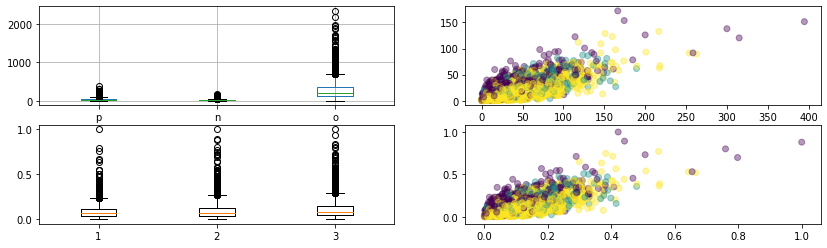

In [51]:
fig, ax = plt.subplots(figsize=(14, 4), nrows=2, ncols=2)
X.boxplot(ax=ax[0,0])
ax[0,1].scatter(X.p, X.n, alpha=0.4, c=binary_scores)
ax[1,0].boxplot(Xs)
ax[1,1].scatter(Xs[:,0], Xs[:,1], alpha=0.4, c=binary_scores)
plt.show()

In [54]:
Xs.argmax(axis=1)

array([2, 2, 2, ..., 2, 1, 0])